Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 29s 9s/step - loss: 4.7385 - accuracy: 0.4792 - val_loss: 6.1876 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 24s 9s/step - loss: 6.9179 - accuracy: 0.5000 - val_loss: 3.6600 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 29s 11s/step - loss: 3.1374 - accuracy: 0.4583 - val_loss: 3.6720 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 29s 11s/step - loss: 2.3602 - accuracy: 0.4583 - val_loss: 2.3899 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 29s 11s/step - loss: 1.8142 - accuracy: 0.5000 - val_loss: 1.3138 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 30s 11s/step - loss: 1.2483 - accuracy: 0.5312 - val_loss: 0.7473 - val_accuracy: 0.5417
Epoch 7/10
3/3 [==============================] - 27s 9s/step - loss: 0.9571 - accuracy:

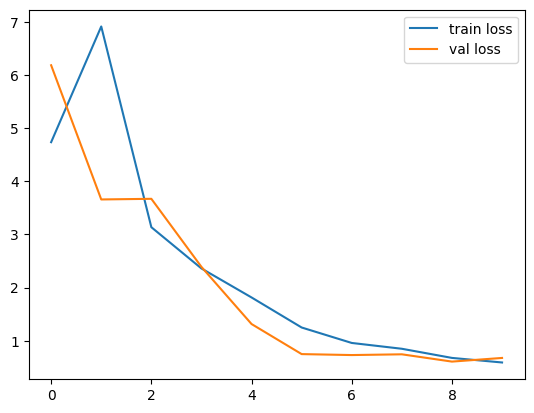

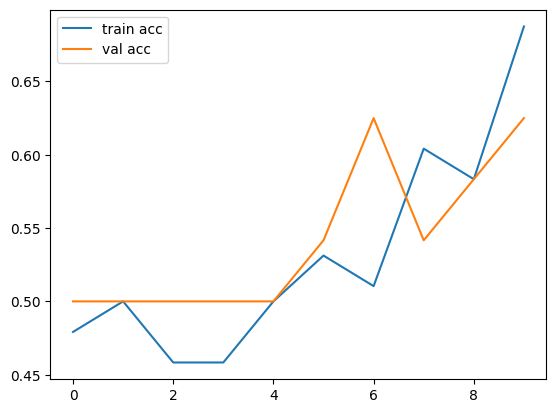

<ipython-input-3-18827ac4967b>:84: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_scores = model.evaluate_generator(training_set, steps=len(training_set))


Training Accuracy: 70.83%


<ipython-input-3-18827ac4967b>:88: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_scores = model.evaluate_generator(test_set, steps=len(test_set))


Testing Accuracy: 62.50%


In [3]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/2Classes/train'
valid_path = '/content/drive/MyDrive/2Classes/test'

# add preprocessing layer to the front of ResNet50
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/drive/MyDrive/2Classes/train/*')

# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Image Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/2Classes/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/2Classes/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# Fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate the model on training data
train_scores = model.evaluate_generator(training_set, steps=len(training_set))
print("Training Accuracy: %.2f%%" % (train_scores[1] * 100))

# Evaluate the model on testing data
test_scores = model.evaluate_generator(test_set, steps=len(test_set))
print("Testing Accuracy: %.2f%%" % (test_scores[1] * 100))


In [4]:
model.save('/content/drive/MyDrive/2Classes/resNet50_model_10_2Classes.h5')